## Lecture 02-03: Probability distributions, Random processes
#### Non-Uniform Random Numbers: Transforming Probability Distributions
##### Consider an arbitrary PDF
How do we evaluate trials in a non-uniform PDF? We need to map random numbers on the interval $x\in [0,1]$, but we need it to represent the probability distribution 
$$ p(x) = \mu e^{-\mu x} $$
Using this distribution, we calculate 
$$ \mu \int_0^{x(z) e^{-\mu x'} \, \mathrm{d}x' = 1 - e^{-\mu x} = z $$
This expression above represents the cumulative distribution function (CDF): since the CDF must integrate to one, we transform the x value of the CDF to the z value on the interval 0:1 for the uniform distribution. 

##### Consider the case of a Gaussian Random Process
...
##### Rutherford Scattering
The process of rutherford scattering corrresponds to the electronic scattering (Coulomb interaction collision; in this case, $\alpha$ particles). We are interested in the number of particles that reflect back. A beam of $\alpha$ particles has a beam spread $\sigma = a_0 / 100$. The scattering angle satisfies:

$$ \tan{\frac{\theta}{2}} = \frac{Z e^2}{2 \pi \epsilon_0 E b} $$

The code is copied from 08_rutherford.py:


In [10]:
import numpy as np
from numpy.random import random

def backscatter_prob(length):
    prob_arr = np.zeros(length)
    for j in range(length):
        # Constants
        Z = 79
        e = 1.602e-19
        E = 7.7e6*e
        epsilon0 = 8.854e-12
        a0 = 5.292e-11
        sigma = a0/100
        N = 100000
        
        
        def theta(b):
            fact = (Z * (e ** 2))/(2. * np.pi * epsilon0 * E * b)
            return (2. * np.arctan(fact))
            
        def rad(z):
            radical = -2. * (sigma ** 2) * np.log(1. - z)
            return np.sqrt(radical)
        
        # Complete in-class
        # Function to generate two Gaussian random numbers
        # Optional: Use array arithmetic to speed-up
        def gaussian():
            x = y = 0
            return x,y
        
        count = 0
        for i in range(N):
            rand_var = np.random.random()
            b_val = rad(rand_var)
            if (theta(b_val) > (np.pi/2.)):
                count += 1
                #print('backscattered particle')
            # Complete in-class
            # For every particle, calculate a random position (x,y) and determine 
            # whether it's back-scattered (b < some critical radii)
    
        print("%d particles were reflected out of %d in trial %d" % (count,N,j))
        prob_arr[j] = count
    print(prob_arr)
    return prob_arr

In [22]:

a = backscatter_prob(10)
import matplotlib.pyplot as plt
import scipy
# scipy + numpy
def get_stats(v):
    res = scipy.stats.describe(v)
    return np.concatenate([
        [
            res.minmax[0],
            res.minmax[1],
            res.mean,
            res.variance,
            res.skewness,
            res.kurtosis
        ],
        np.percentile(v, q=[10, 25, 50, 75, 90])
    ])
#print(get_stats(a))

155 particles were reflected out of 100000 in trial 0
157 particles were reflected out of 100000 in trial 1
158 particles were reflected out of 100000 in trial 2
163 particles were reflected out of 100000 in trial 3
149 particles were reflected out of 100000 in trial 4
139 particles were reflected out of 100000 in trial 5
178 particles were reflected out of 100000 in trial 6
137 particles were reflected out of 100000 in trial 7
163 particles were reflected out of 100000 in trial 8
157 particles were reflected out of 100000 in trial 9
[155. 157. 158. 163. 149. 139. 178. 137. 163. 157.]


#### Monte Carlo Integration
##### Consider integrating the ill-behaved function:
$$ f(x) = \sin^2{\left [ \frac{1}{2(2-x)} \right ] } $$

- we wish to integrate from 0 to 2
- rapidly varies near integration limits, so regular integration methods would be ill-suited

- we wish to calculate pi: consider randomly generated points in the unit circle

In [39]:
def estimate_pi(N):
    count = 0
    for i in range(N):
        x, y = np.random.random(), np.random.random()
        radius = np.sqrt( (x**2) + (y**2))
        if (radius <= 1.):
            count += 1
        x, y = 0., 0.
        
    int_value = float(count) / float(N)
    pi_est = 4.* int_value
    return pi_est

pi_arr = []
N_arr = []

c_val = 2
for j in range(24):
    nval = c_val ** j
    N_arr.append(nval)
    pi_arr.append(estimate_pi(nval))


            

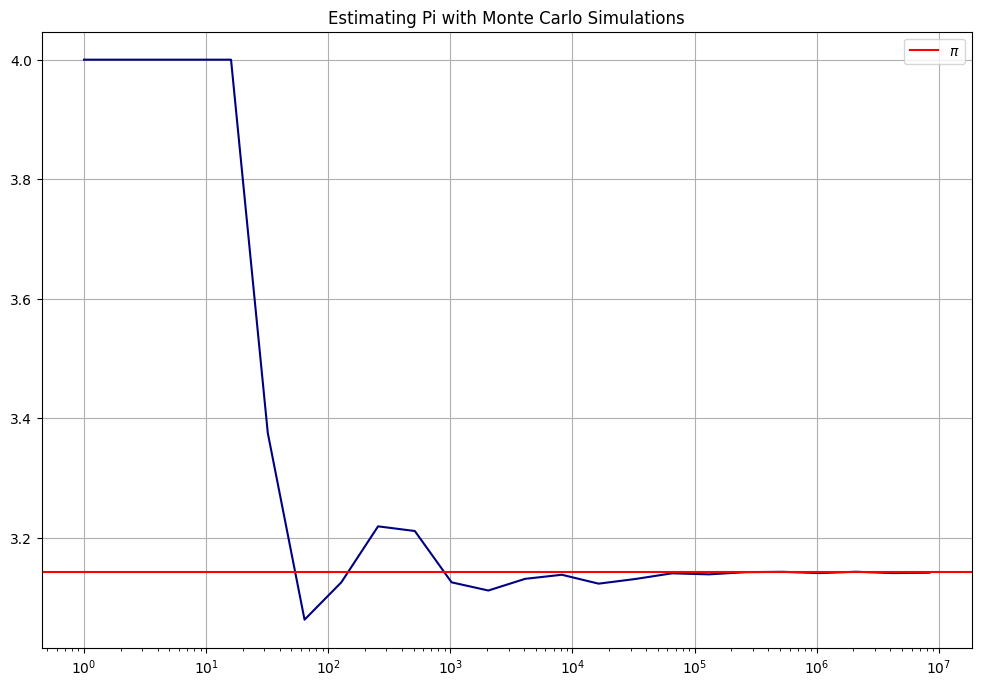

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
plt.semilogx(N_arr,pi_arr,color='navy')
ax.axhline(np.pi,color='red',label='$\pi$')
plt.legend()
plt.grid()
plt.title('Estimating Pi with Monte Carlo Simulations')
plt.show()

#### Mean value Method
- The most basic MC method may not give accurate results depending on the context of the problem
- Suppose you wish to calculate the mean value of a function:
$$ \langle f \rangle = \frac{1}{b-a} \int_a^b f(x) \,\mathrm{d} x $$
- This method is more accurate for slowly varying / smooth functions
- The integration error follows from the variance

$$ \sigma^2(f) = \langle f^2 \rangle - \langle f \rangle ^2 $$
$$ \sigma = \frac{b-a}{N} \sqrt{N \sigma^2(f)} = (b-a) \sqrt{\frac{\sigma^2(f)}{N}} $$
- the error behaves as $O(N^{-1/2})$
- this method is most useful in high-dimensional (e.g., over phase space) integrals where finite differencing errors compound and become more intractible: (100 slices per dimension in 6D is 1 trillion points!)
- However, the Mean Value MC method is given by:
$$ I \approx \frac{V}{N} \sum_{i=1}^N f(\mathbf{r}_i) $$

#### Importance Sampling
- A generalized case of the above Mean Value problem
- Suppose functions diverge even when their integrals don't diverge (e.g., at the origin a Fermi gas diverges at the origin)
- We wish to "favor" values of $x$ where the function doesn't diverge
- $=>$ We place higher weights on the samples near the diverging point, satisfying the weighted mean:
  $$ \langle g \rangle_w = \frac{\int_a^b w(x) g(x) \,\mathrm{d}x}{\int_a^b w(x) \,\mathrm{d}x} $$
- Take $I=\int_a^b f(x) \, \mathrm{d}x$ and $g(x) \equiv f(x) / w(x)$:
  $$\sum_{i=1}^N g(x_i) \approx \int_a^b N p(x) g(x) \,\mathrm{d} x $$
- Strategy: choose $w(x)$ that factors out the diverging part of $f$.
- the error also behaves as $O(N^{-1/2})$, but may be lower for well-chosen $w$
- this follows from how the Mean Value MC method is recovered by setting $w$ to unity.